In [65]:
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold

SEED = 12345

In [66]:
data = pd.read_csv('hmda_train_preprocessed.csv')
test = pd.read_csv('hmda_test_preprocessed.csv')


In [67]:
data.head()

,row_id,black,asian,white,amind,hipac,hispanic,non_hispanic,male,female,...,conforming,debt_to_income_ratio_missing,loan_amount_std,loan_to_value_ratio_std,no_intro_rate_period_std,intro_rate_period_std,property_value_std,income_std,debt_to_income_ratio_std,high_priced
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,...,1,0,-0.514393,0.333922,0.244394,-0.215304,-0.535932,-0.040307,0.854601,0
1,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,NaN,NaN,...,1,0,-0.118642,0.268727,0.244394,-0.215304,-0.227585,-0.018133,-0.425131,0
2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,0,-0.778227,0.228996,-4.091747,4.610857,-0.720941,-0.032338,0.123326,0
3,3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,NaN,NaN,...,1,0,-0.074670,-1.150240,0.244394,-0.215304,0.358276,-0.018133,-0.425131,0
4,4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,NaN,NaN,...,1,0,-0.602338,0.552520,0.244394,-0.215304,-0.628437,-0.038228,0.763191,0


In [68]:
# Define the target and predictor variables

y_name = data['high_priced']

x_names = data.drop(['row_id','black','asian','white','amind','hipac','hispanic','non_hispanic','male','female',
                    'agegte62', 'agelt62', 'high_priced'], axis=1)


In [69]:
x_names

,term_360,conforming,debt_to_income_ratio_missing,loan_amount_std,loan_to_value_ratio_std,no_intro_rate_period_std,intro_rate_period_std,property_value_std,income_std,debt_to_income_ratio_std
0,1,1,0,-0.514393,0.333922,0.244394,-0.215304,-0.535932,-0.040307,0.854601
1,1,1,0,-0.118642,0.268727,0.244394,-0.215304,-0.227585,-0.018133,-0.425131
2,1,1,0,-0.778227,0.228996,-4.091747,4.610857,-0.720941,-0.032338,0.123326
3,1,1,0,-0.074670,-1.150240,0.244394,-0.215304,0.358276,-0.018133,-0.425131
4,1,1,0,-0.602338,0.552520,0.244394,-0.215304,-0.628437,-0.038228,0.763191
...,...,...,...,...,...,...,...,...,...,...
160333,1,1,0,0.365054,0.663316,0.244394,-0.215304,0.019094,-0.015361,1.585876
160334,1,1,0,-0.558366,0.552520,0.244394,-0.215304,-0.597602,-0.039268,1.585876
160335,1,0,0,9.599253,-0.463082,-4.091747,2.197776,9.084518,0.270486,0.397554
160336,1,1,0,-0.998089,0.552520,0.244394,-0.215304,-0.905950,-0.039614,-0.425131


In [72]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_names, y_name, test_size=0.2, stratify=y_name, random_state=0)

In [73]:
from keras.models import Sequential
from keras.layers import Dense
 
model = Sequential() 
model.add(Dense(128, activation='relu', input_dim=10))
model.add(Dense(1, activation='sigmoid')) 
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 128)               1408      
                                                                 
 dense_15 (Dense)            (None, 1)                 129       
                                                                 
Total params: 1,537
Trainable params: 1,537
Non-trainable params: 0
_________________________________________________________________


In [76]:
hist = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=30, batch_size=50)

Epoch 1/30
2566/2566 [==============================] - 6s 2ms/step - loss: 0.2542 - accuracy: 0.9039 - val_loss: 0.2562 - val_accuracy: 0.9036
Epoch 2/30
2566/2566 [==============================] - 6s 2ms/step - loss: 0.2542 - accuracy: 0.9038 - val_loss: 0.2548 - val_accuracy: 0.9033
Epoch 3/30
2566/2566 [==============================] - 5s 2ms/step - loss: 0.2543 - accuracy: 0.9037 - val_loss: 0.2577 - val_accuracy: 0.9037
Epoch 4/30
2566/2566 [==============================] - 5s 2ms/step - loss: 0.2544 - accuracy: 0.9038 - val_loss: 0.2558 - val_accuracy: 0.9034
Epoch 5/30
2566/2566 [==============================] - 5s 2ms/step - loss: 0.2541 - accuracy: 0.9039 - val_loss: 0.2563 - val_accuracy: 0.9038
Epoch 6/30
2566/2566 [==============================] - 5s 2ms/step - loss: 0.2540 - accuracy: 0.9037 - val_loss: 0.2562 - val_accuracy: 0.9032
Epoch 7/30
2566/2566 [==============================] - 5s 2ms/step - loss: 0.2542 - accuracy: 0.9037 - val_loss: 0.2563 - val_accuracy:

[]

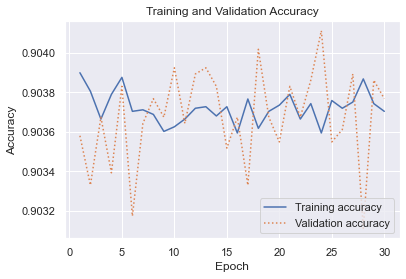

In [77]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
 
acc = hist.history['accuracy']
val = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)
 
plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

1003/1003 [==============================] - 1s 1ms/step


Text(89.133125, 0.5, 'Actual label')

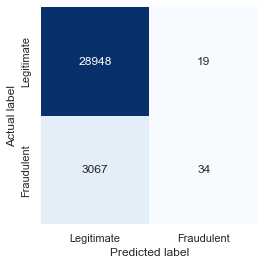

In [78]:
from sklearn.metrics import confusion_matrix
 
y_predicted = model.predict(x_test) > 0.5
mat = confusion_matrix(y_test, y_predicted)
labels = ['Legitimate', 'Fraudulent']
 
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)
 
plt.xlabel('Predicted label')
plt.ylabel('Actual label')

In [83]:
model.predict(test[1:])

InvalidArgumentError: Graph execution error:

Detected at node 'sequential_7/dense_14/Relu' defined at (most recent call last):
    File "/Users/harshitaggarwal/opt/anaconda3/lib/python3.8/runpy.py", line 194, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/Users/harshitaggarwal/opt/anaconda3/lib/python3.8/runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "/Users/harshitaggarwal/opt/anaconda3/lib/python3.8/site-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/Users/harshitaggarwal/opt/anaconda3/lib/python3.8/site-packages/traitlets/config/application.py", line 845, in launch_instance
      app.start()
    File "/Users/harshitaggarwal/opt/anaconda3/lib/python3.8/site-packages/ipykernel/kernelapp.py", line 612, in start
      self.io_loop.start()
    File "/Users/harshitaggarwal/opt/anaconda3/lib/python3.8/site-packages/tornado/platform/asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "/Users/harshitaggarwal/opt/anaconda3/lib/python3.8/asyncio/base_events.py", line 570, in run_forever
      self._run_once()
    File "/Users/harshitaggarwal/opt/anaconda3/lib/python3.8/asyncio/base_events.py", line 1859, in _run_once
      handle._run()
    File "/Users/harshitaggarwal/opt/anaconda3/lib/python3.8/asyncio/events.py", line 81, in _run
      self._context.run(self._callback, *self._args)
    File "/Users/harshitaggarwal/opt/anaconda3/lib/python3.8/site-packages/tornado/ioloop.py", line 688, in <lambda>
      lambda f: self._run_callback(functools.partial(callback, future))
    File "/Users/harshitaggarwal/opt/anaconda3/lib/python3.8/site-packages/tornado/ioloop.py", line 741, in _run_callback
      ret = callback()
    File "/Users/harshitaggarwal/opt/anaconda3/lib/python3.8/site-packages/tornado/gen.py", line 814, in inner
      self.ctx_run(self.run)
    File "/Users/harshitaggarwal/opt/anaconda3/lib/python3.8/site-packages/tornado/gen.py", line 775, in run
      yielded = self.gen.send(value)
    File "/Users/harshitaggarwal/opt/anaconda3/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 365, in process_one
      yield gen.maybe_future(dispatch(*args))
    File "/Users/harshitaggarwal/opt/anaconda3/lib/python3.8/site-packages/tornado/gen.py", line 234, in wrapper
      yielded = ctx_run(next, result)
    File "/Users/harshitaggarwal/opt/anaconda3/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 268, in dispatch_shell
      yield gen.maybe_future(handler(stream, idents, msg))
    File "/Users/harshitaggarwal/opt/anaconda3/lib/python3.8/site-packages/tornado/gen.py", line 234, in wrapper
      yielded = ctx_run(next, result)
    File "/Users/harshitaggarwal/opt/anaconda3/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 543, in execute_request
      self.do_execute(
    File "/Users/harshitaggarwal/opt/anaconda3/lib/python3.8/site-packages/tornado/gen.py", line 234, in wrapper
      yielded = ctx_run(next, result)
    File "/Users/harshitaggarwal/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py", line 306, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "/Users/harshitaggarwal/opt/anaconda3/lib/python3.8/site-packages/ipykernel/zmqshell.py", line 536, in run_cell
      return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
    File "/Users/harshitaggarwal/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 2894, in run_cell
      result = self._run_cell(
    File "/Users/harshitaggarwal/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 2940, in _run_cell
      return runner(coro)
    File "/Users/harshitaggarwal/opt/anaconda3/lib/python3.8/site-packages/IPython/core/async_helpers.py", line 68, in _pseudo_sync_runner
      coro.send(None)
    File "/Users/harshitaggarwal/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3165, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/Users/harshitaggarwal/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3357, in run_ast_nodes
      if (await self.run_code(code, result,  async_=asy)):
    File "/Users/harshitaggarwal/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3437, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "<ipython-input-80-c0ac8462bce6>", line 1, in <module>
      model.predict(test)
    File "/Users/harshitaggarwal/opt/anaconda3/lib/python3.8/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/Users/harshitaggarwal/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py", line 2033, in predict
      tmp_batch_outputs = self.predict_function(iterator)
    File "/Users/harshitaggarwal/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py", line 1845, in predict_function
      return step_function(self, iterator)
    File "/Users/harshitaggarwal/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py", line 1834, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/harshitaggarwal/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py", line 1823, in run_step
      outputs = model.predict_step(data)
    File "/Users/harshitaggarwal/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py", line 1791, in predict_step
      return self(x, training=False)
    File "/Users/harshitaggarwal/opt/anaconda3/lib/python3.8/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/Users/harshitaggarwal/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py", line 490, in __call__
      return super().__call__(*args, **kwargs)
    File "/Users/harshitaggarwal/opt/anaconda3/lib/python3.8/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/Users/harshitaggarwal/opt/anaconda3/lib/python3.8/site-packages/keras/engine/base_layer.py", line 1014, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/Users/harshitaggarwal/opt/anaconda3/lib/python3.8/site-packages/keras/utils/traceback_utils.py", line 92, in error_handler
      return fn(*args, **kwargs)
    File "/Users/harshitaggarwal/opt/anaconda3/lib/python3.8/site-packages/keras/engine/sequential.py", line 374, in call
      return super(Sequential, self).call(inputs, training=training, mask=mask)
    File "/Users/harshitaggarwal/opt/anaconda3/lib/python3.8/site-packages/keras/engine/functional.py", line 458, in call
      return self._run_internal_graph(
    File "/Users/harshitaggarwal/opt/anaconda3/lib/python3.8/site-packages/keras/engine/functional.py", line 596, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "/Users/harshitaggarwal/opt/anaconda3/lib/python3.8/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/Users/harshitaggarwal/opt/anaconda3/lib/python3.8/site-packages/keras/engine/base_layer.py", line 1014, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/Users/harshitaggarwal/opt/anaconda3/lib/python3.8/site-packages/keras/utils/traceback_utils.py", line 92, in error_handler
      return fn(*args, **kwargs)
    File "/Users/harshitaggarwal/opt/anaconda3/lib/python3.8/site-packages/keras/layers/core/dense.py", line 235, in call
      outputs = self.activation(outputs)
    File "/Users/harshitaggarwal/opt/anaconda3/lib/python3.8/site-packages/keras/activations.py", line 311, in relu
      return backend.relu(x, alpha=alpha, max_value=max_value, threshold=threshold)
    File "/Users/harshitaggarwal/opt/anaconda3/lib/python3.8/site-packages/keras/backend.py", line 4992, in relu
      x = tf.nn.relu(x)
Node: 'sequential_7/dense_14/Relu'
Matrix size-incompatible: In[0]: [32,22], In[1]: [10,128]
	 [[{{node sequential_7/dense_14/Relu}}]] [Op:__inference_predict_function_8124999]